# Programming Assignment 1: Visualize Data Using a Chart

## Data Visualization Course - Coursera

* Author: Michael Onishi
* Date: October 1st, 2019

### Dataset

Wine Reviews, taken from Kaggle: https://www.kaggle.com/zynicide/wine-reviews#winemag-data-130k-v2.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Loading the dataset

In [2]:
df = pd.read_csv('data/winemag-data-130k-v2.csv')

In [3]:
df.shape

(129971, 14)

In [4]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Filtering columns and handling missing values

In [5]:
# filtering only target columns 
df_filtered = df[['points', 'price']]

In [6]:
# removing rows with missing data 
df_filtered = df_filtered.dropna()

In [7]:
df_filtered.shape

(120975, 2)

### Some basic exploration

Text(0, 0.5, 'Count')

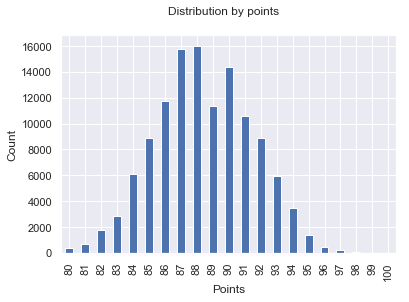

In [8]:
df_filtered.points.value_counts(sort=False).plot.bar()
plt.suptitle("Distribution by points")
plt.xlabel("Points")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

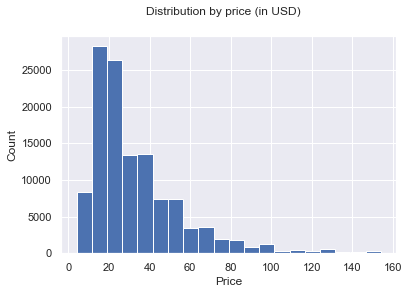

In [9]:
# showing only wines with prices below the 99th quantile
price_99qnt = df_filtered.price.quantile(0.99)
df_filtered[df_filtered.price < price_99qnt].price.hist(bins=20)
plt.suptitle("Distribution by price (in USD)")
plt.xlabel("Price")
plt.ylabel("Count")

### Finally, let's see how price is related to points

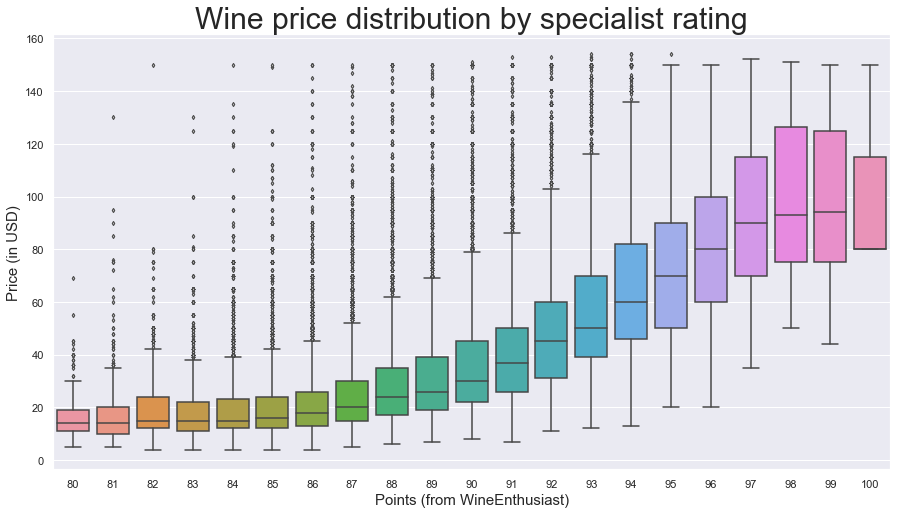

In [10]:
plt.figure(figsize=(15, 8))
flierprops = dict(markerfacecolor='0.75', markersize=3, linestyle='none')
g = sns.boxplot(x="points", y="price", data=df_filtered[df_filtered.price < price_99qnt], flierprops=flierprops)
g.axes.set_title("Wine price distribution by specialist rating",fontsize=30)
g.set_xlabel("Points (from WineEnthusiast)",fontsize=15)
g.set_ylabel("Price (in USD)",fontsize=15)
g.yaxis.grid(True)

### A paragraph about the visualization

This visualization is trying to show the relationship between wine price and wine rating given by specialists by plotting the price distribution by each score points.

The visualization is assembled with two variables: points (x-axis) and price (y-axis).

I have used some filtering on the dataset. First, I removed all the rows with missing values in the two columns studied. Then I only considered rows with prices below the 99th price quantile to remove some outliers that were making the visualization more difficult to understand.

As I was expecting, this visualization shows a positive correlation between points and price. Another interesting aspect is that the wine prices appears to grow faster when the score passes the 89 points. Probably it requires much more effort (and money) to get little gains in quality after that threshold. Finally, there are some wines in the market that are considerably expensive, but received low ratings. I would be very angry if I bought a 100 dollars mediocre wine, wouldn't you?